<a href="https://colab.research.google.com/github/icarocarmona/tech_challenge_f1/blob/main/notebooks/C%C3%B3pia_de_Analise_MacroV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# adicionar aqui as importações
import pandas as pd
import locale

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/trusted/dados_de_vinhos.csv', sep=';')

In [3]:
df

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação
2,Bolívia,36,24,1970,Brasil,Espumantes,Exportação
3,Vietnã,0,0,1970,Brasil,Espumantes,Exportação
4,Líbano,0,0,1970,Brasil,Espumantes,Exportação
...,...,...,...,...,...,...,...
25276,Guiana Francesa,0,0,2022,Brasil,Uvas,Exportação
25277,Guadalupe,0,0,2022,Brasil,Uvas,Exportação
25278,Georgia,0,0,2022,Brasil,Uvas,Exportação
25279,Gana,0,0,2022,Brasil,Uvas,Exportação


In [4]:
df.value_counts('Tipo Vinho')

Tipo Vinho
Vinho De Mesa    6784
Uvas             6731
Sucos            6413
Espumantes       5353
dtype: int64

In [5]:
pip install seaborn

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Filtro por tipo de vinho (Vinho De Mesa)
tipo_de_vinho = 'Vinho De Mesa'
df_filtrado = df[df['Tipo Vinho'] == tipo_de_vinho]

In [10]:
df_filtrado_2 = df_filtrado[df_filtrado['Ano'].isin([1999,2000, 2001, 2002])]
soma_valores = df_filtrado_2.groupby('Ano')[['Quantidade (L)','Valor U$']].sum()
df_soma_anos = soma_valores.reset_index()
df_soma_anos.columns = ['Ano','Soma de Quantidade (L)' ,'Soma de Valor U$']

df_soma_anos

,Ano,Soma de Quantidade (L),Soma de Valor U$
0,1999,6765937,4074292
1,2000,6288613,3463277
2,2001,2654582,1313229
3,2002,2250037,1082939


In [11]:
df_soma_anos[df_soma_anos['Ano'] == 1999]['Soma de Valor U$']

0    4074292
Name: Soma de Valor U$, dtype: int64

In [12]:
df_soma_anos['Variação Vl Pct'] = df_soma_anos['Soma de Valor U$'].pct_change() * 100
df_soma_anos['Variação Qtd Pct'] = df_soma_anos['Soma de Quantidade (L)'].pct_change() * 100
df_soma_anos.head()


,Ano,Soma de Quantidade (L),Soma de Valor U$,Variação Vl Pct,Variação Qtd Pct
0,1999,6765937,4074292,NaN,NaN
1,2000,6288613,3463277,-14.996839,-7.054810
2,2001,2654582,1313229,-62.081318,-57.787480
3,2002,2250037,1082939,-17.536165,-15.239499


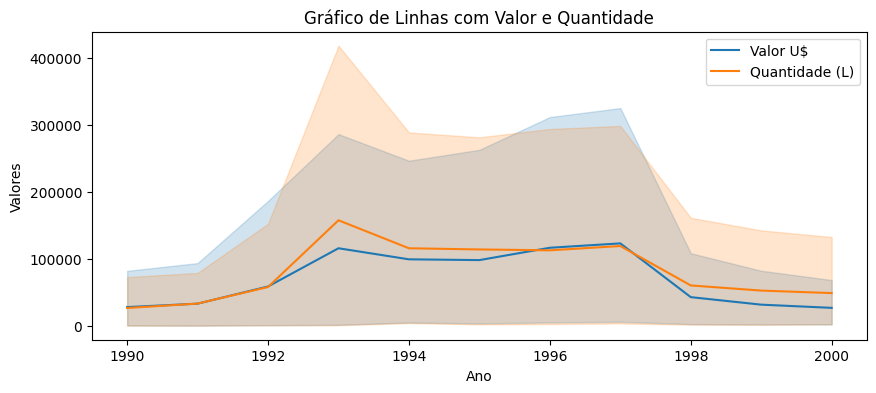

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_filtrado é o DataFrame original

# Filtrar os anos desejados
df_6_anos = df_filtrado[df_filtrado['Ano'].between(1990, 2000)]

# Defina o tamanho da figura
plt.figure(figsize=(10, 4))

# Crie o gráfico de linhas
ax = sns.lineplot(data=df_6_anos, x='Ano', y='Valor U$', label='Valor U$')
ax = sns.lineplot(data=df_6_anos, x='Ano', y='Quantidade (L)', label='Quantidade (L)')

# Defina rótulos e legendas
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Gráfico de Linhas com Valor e Quantidade')
plt.legend()

# Exiba o gráfico
plt.show()



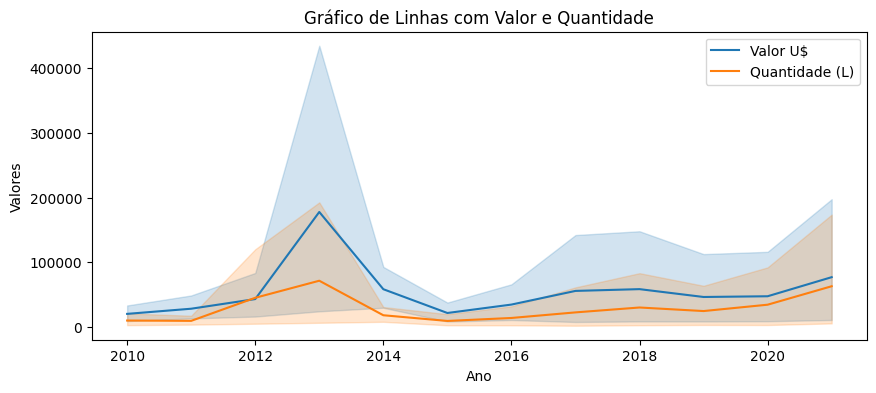

In [15]:
# Supondo que df_filtrado é o DataFrame original

# Filtrar os anos desejados
df_6_anos = df_filtrado[df_filtrado['Ano'].between(2010, 2021)]

# Defina o tamanho da figura
plt.figure(figsize=(10, 4))

# Crie o gráfico de linhas
ax = sns.lineplot(data=df_6_anos, x='Ano', y='Valor U$', label='Valor U$')
ax = sns.lineplot(data=df_6_anos, x='Ano', y='Quantidade (L)', label='Quantidade (L)')

# Defina rótulos e legendas
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Gráfico de Linhas com Valor e Quantidade')
plt.legend()

# Exiba o gráfico
plt.show()

In [ ]:
filtro = (df_filtrado['Ano'].isin([2008])) & (df_filtrado['Valor U$'] > 0)
df_08 = df_filtrado[filtro]
df_08 = df_08.sort_values('Valor U$', ascending=False).reset_index()

total_valores = df_08['Valor U$'].sum()
df_08['Participação'] = (df_08['Valor U$'] / total_valores) * 100
df_08.head(5)

,index,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,Participação
0,10217,Rússia,6207658,2352768,2008,Brasil,Vinho De Mesa,Exportação,33.053315
1,10218,Paraguai,2191901,1374088,2008,Brasil,Vinho De Mesa,Exportação,19.304140
2,10219,Estados Unidos,443895,804607,2008,Brasil,Vinho De Mesa,Exportação,11.303677
3,10220,Países Baixos,340412,783635,2008,Brasil,Vinho De Mesa,Exportação,11.009047
4,10221,"Alemanha, República Democrática",265742,429970,2008,Brasil,Vinho De Mesa,Exportação,6.040516


In [ ]:
filtro = (df_filtrado['Ano'].isin([2007])) & (df_filtrado['Valor U$'] > 0)
df_08 = df_filtrado[filtro]
df_08 = df_08.sort_values('Valor U$', ascending=False).reset_index()

total_valores = df_08['Valor U$'].sum()
df_08['Participação'] = (df_08['Valor U$'] / total_valores) * 100
df_08.head(10)

,index,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,Participação
0,10089,Estados Unidos,479269,810038,2007,Brasil,Vinho De Mesa,Exportação,21.975177
1,10090,Paraguai,1285459,801519,2007,Brasil,Vinho De Mesa,Exportação,21.744069
2,10091,Países Baixos,181046,364751,2007,Brasil,Vinho De Mesa,Exportação,9.895175
3,10092,Japão,357943,316867,2007,Brasil,Vinho De Mesa,Exportação,8.596150
4,10093,"Alemanha, República Democrática",119512,238052,2007,Brasil,Vinho De Mesa,Exportação,6.458012
5,10094,"Tcheca, República",85303,189620,2007,Brasil,Vinho De Mesa,Exportação,5.144121
6,10095,Rússia,266400,173160,2007,Brasil,Vinho De Mesa,Exportação,4.697584
7,10096,Portugal,109074,165282,2007,Brasil,Vinho De Mesa,Exportação,4.483865
8,10097,Reino Unido,84613,144244,2007,Brasil,Vinho De Mesa,Exportação,3.913134
9,10098,Suíça,26090,70716,2007,Brasil,Vinho De Mesa,Exportação,1.918424


<Figure size 1000x600 with 0 Axes>

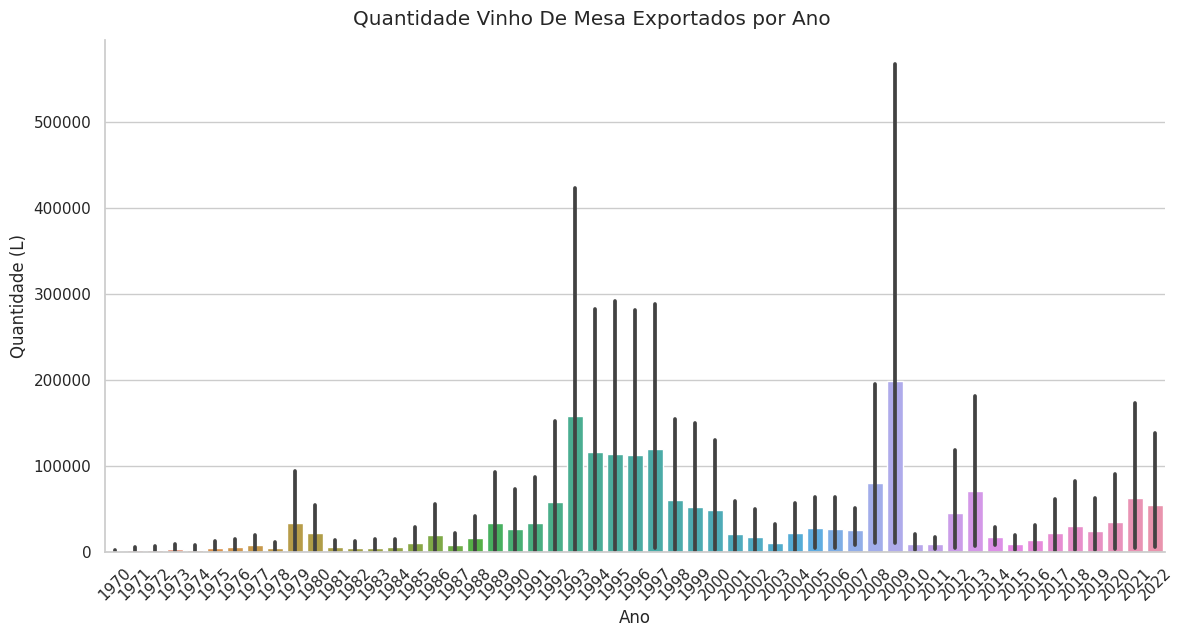

In [ ]:
# Crie um gráfico usando Seaborn catplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
g = sns.catplot(data=df_filtrado, x='Ano', y='Quantidade (L)', kind='bar', height=6, aspect=2)
g.fig.suptitle(f'Quantidade {tipo_de_vinho} Exportados por Ano', y=1.02)
plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')

# Rotacionar os rótulos dos anos para torná-los mais legíveis
g.set_xticklabels(rotation=45)

plt.show()

In [ ]:

tabela = pd.read_csv('https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/raw/Producao.csv', sep=';')

In [ ]:
# Suponhamos que você tenha um DataFrame chamado "tabela" com os dados
# Vamos usar o método "melt" para reorganizar a tabela

# Primeiro, crie uma lista de anos das colunas da tabela
anos = [str(ano) for ano in range(1970, 2023)]

# Use o método "melt" para transformar a tabela
tabela_melted = tabela.melt(id_vars=["id", "produto"], value_vars=anos, var_name="Ano", value_name="Quantidade (L)")

# Agora, você tem uma tabela tidy que pode ser usada para criar gráficos
print(tabela_melted.head())


   id                        produto   Ano  Quantidade (L)
0   1                  VINHO DE MESA  1970       217208604
1   2                          Tinto  1970       174224052
2   3                         Branco  1970          748400
3   4                         Rosado  1970        42236152
4   5  VINHO FINO DE MESA (VINÍFERA)  1970        23899346


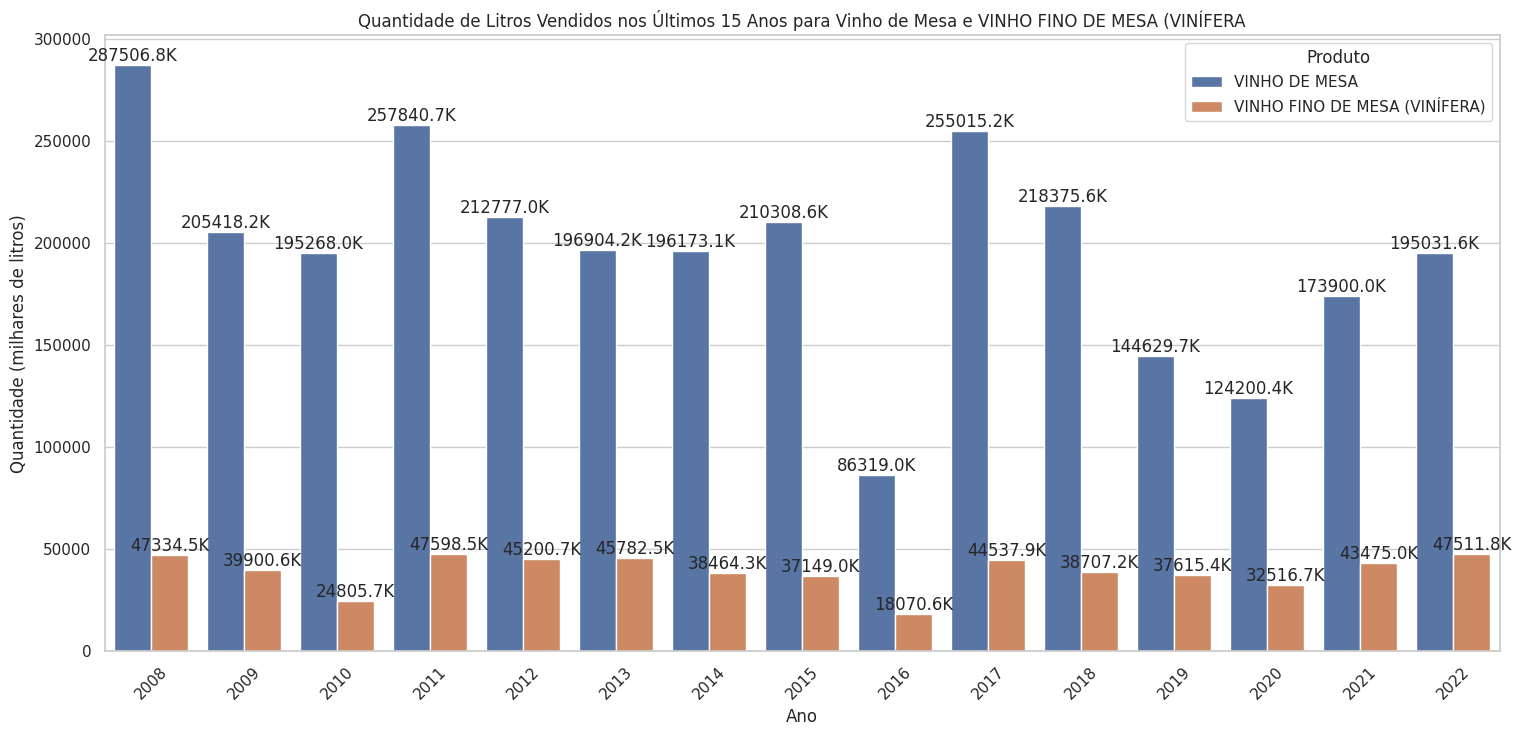

In [ ]:

# Suponhamos que você tenha uma tabela_melted com os dados reorganizados

# Filtrar linhas para "Vinho de Mesa" e "Rosado"
produtos_desejados = tabela_melted[tabela_melted['produto'].isin(["VINHO DE MESA", "VINHO FINO DE MESA (VINÍFERA)"])]

# Filtrar apenas os 15 anos mais recentes
anos_recentes = [str(ano) for ano in range(2008, 2023)]  # 2008 a 2022
produtos_desejados = produtos_desejados[produtos_desejados['Ano'].isin(anos_recentes)]

# Normalizar as quantidades (dividir por 1.000)
produtos_desejados.loc[:, 'Quantidade (L)'] = produtos_desejados['Quantidade (L)'] / 1000

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")
ax = sns.barplot(data=produtos_desejados, x="Ano", y="Quantidade (L)", hue="produto")

# Adicionar rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


plt.title("Quantidade de Litros Vendidos nos Últimos 15 Anos para Vinho de Mesa e VINHO FINO DE MESA (VINÍFERA")
plt.xlabel("Ano")
plt.ylabel("Quantidade (milhares de litros)")
plt.xticks(rotation=45)
plt.legend(title="Produto")

plt.show()


In [ ]:
paises = df_filtrado['Destino'].unique()


In [ ]:
produtos_desejados.head()

,id,produto,Ano,Quantidade (L)
1938,1,VINHO DE MESA,2008,287506.811
1942,5,VINHO FINO DE MESA (VINÍFERA),2008,47334.501
1989,1,VINHO DE MESA,2009,205418.206
1993,5,VINHO FINO DE MESA (VINÍFERA),2009,39900.568
2040,1,VINHO DE MESA,2010,195267.980


In [ ]:
df_sem_zero = df[df['Quantidade (L)'] > 0]
df_sem_zero.head(2)

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação


In [ ]:
country = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
country.head(5)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [ ]:
paises = pd.read_csv('/content/pais.csv', encoding='latin-1', sep=';')
paises.head()

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"


In [ ]:
df_completo = df_sem_zero.merge(paises, left_on='Destino', right_on='NO_PAIS',how='left')
df_completo.head(5)

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação,NaN,NaN,NaN,NaN,NaN,NaN
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação,586.0,600.0,PRY,Paraguai,Paraguay,Paraguay
2,Bolívia,36,24,1970,Brasil,Espumantes,Exportação,97.0,68.0,BOL,Bolívia,Bolivia,Bolivia
3,Bolívia,350,208,1971,Brasil,Espumantes,Exportação,97.0,68.0,BOL,Bolívia,Bolivia,Bolivia
4,Paraguai,160,86,1971,Brasil,Espumantes,Exportação,586.0,600.0,PRY,Paraguai,Paraguay,Paraguay


In [ ]:
df_completo = df_completo.merge(country, left_on='CO_PAIS_ISON3', right_on='country-code', how='left')
df_completo.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação,586.0,600.0,PRY,...,PY,PRY,600.0,ISO 3166-2:PY,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
2,Bolívia,36,24,1970,Brasil,Espumantes,Exportação,97.0,68.0,BOL,...,BO,BOL,68.0,ISO 3166-2:BO,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
3,Bolívia,350,208,1971,Brasil,Espumantes,Exportação,97.0,68.0,BOL,...,BO,BOL,68.0,ISO 3166-2:BO,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
4,Paraguai,160,86,1971,Brasil,Espumantes,Exportação,586.0,600.0,PRY,...,PY,PRY,600.0,ISO 3166-2:PY,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0


<Axes: xlabel='Ano', ylabel='Quantidade (L)'>

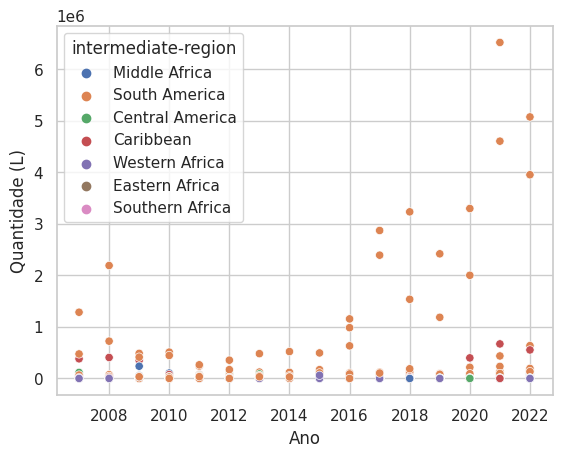

In [ ]:
sns.scatterplot(data=df_completo.query("Ano>=2007"), x='Ano', y='Quantidade (L)', hue='intermediate-region')

In [ ]:
import plotly.express as px
df = px.data.gapminder()

# fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
fig = px.scatter(df_completo.query("Ano>=2007"), x='Ano', y="Quantidade (L)",
                size='Quantidade (L)', color='intermediate-region',
                 hover_name="intermediate-region", log_x=True, size_max=60)
fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df['Quantidade (L)'])))


# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([

                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="-"
    )
)

fig.show()

